
# Table of Contents
<p><div class="lev1 toc-item"><a href="#Importing-librarys" data-toc-modified-id="Importing-librarys-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Librarys</a></div>
<div class="lev1 toc-item"><a href="#Load-Data" data-toc-modified-id="Load-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Data</a></div>
<div class="lev1 toc-item"><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></div>
<div class="lev2 toc-item"><a href="#Data-structure" data-toc-modified-id="Data-structure-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data strcuture</a></div>
<div class="lev2 toc-item"><a href="#Class-imbalance" data-toc-modified-id="Class-imbalance"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Class imbalance</a></div> 
<div class="lev2 toc-item"><a href="#Histogram" data-toc-modified-id="Histogram"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Histogram</a></div>
<div class="lev2 toc-item"><a href="#Boxplot" data-toc-modified-id="Boxplot"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Boxplot</a></div>  
<div class="lev2 toc-item"><a href="#Pairplot" data-toc-modified-id="Pairplot"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Pairplot</a></div> 
<div class="lev2 toc-item"><a href="#Correlations" data-toc-modified-id="Correlations"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Correlations</a></div> 
<div class="lev1 toc-item"><a href="#Processing" data-toc-modified-id="Processing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Processing</a></div>
<div class="lev2 toc-item"><a href="#Dummy-encoding" data-toc-modified-id="Dummy-encoding-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Dummy encoding</a></div>
<div class="lev2 toc-item"><a href="#Ignore-ID" data-toc-modified-id="Ignore-ID-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Ignore ID</a></div>
<div class="lev2 toc-item"><a href="#Splitting" data-toc-modified-id="Splitting-43"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Splitting</a></div>
<div class="lev2 toc-item"><a href="#Rebalance-data" data-toc-modified-id="Rebalance-data-44"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Rebalance data</a></div>
<div class="lev2 toc-item"><a href="#Normalize-data" data-toc-modified-id="Normalize-data-45"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Normalize data</a></div>
<div class="lev2 toc-item"><a href="#Dimensional-reduction" data-toc-modified-id="Dimensional-reduction-46"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Dimensional reduction</a></div>
<div class="lev1 toc-item"><a href="#Modelling:-SVM" data-toc-modified-id="Modelling:-SVM-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modelling: SVM</a></div>
<div class="lev1 toc-item"><a href="#Pipeline & CV" data-toc-modified-id="Pipeline-&-CV-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Pipeline & CV</a></div>
<div class="lev1 toc-item"><a href="#Predict-&-Elevation" data-toc-modified-id="Predict-&-Elevation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Predict & Elevation</a></div>

#1 **Importing** **Librarys**

In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearn.pipeline import Pipeline    #Smote can't be fit into Pipeline
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
!pip install umap-learn
from umap import UMAP
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#2 **Load** **Data**

In [325]:
data = pd.read_csv('breast-cancer.csv') 
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 3 **EDA**

#3.1 Data Sctructure

In [326]:
data.info()
print("----------------------------------------------------------")
print(' ')
print('Data Shape: ',data.shape)
print('----------------------------------------------------------')
print('Checking Missing Values: \n', data.isnull().sum())
print('----------------------------------------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

It's a medical dataset, the dataset has 569 observations and 32 variables. Among these variables, 'id' has the id variable role, 'diagnosis' is a categorical vairable with a low cardinality 2, others are numerical variables. \\
Diagnosis is the target variable, from the column names, we can see that there are 10 different medical measurements, each has three features, 'mean', 'se', and 'worst'. There are 3 groups of numeric variables, each group contains 10 variables. \\
There is no missingness in the dataset. \\
Let's look at the statistical information of the data. 

In [ ]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


The numeric variables value vary from around 0 to around 4000.

#3.2 Class imbalance

Let's look at the distribution of target variable diagnosis.

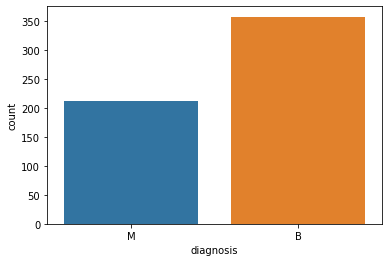

In [ ]:
sns.countplot(x = 'diagnosis',data = data)

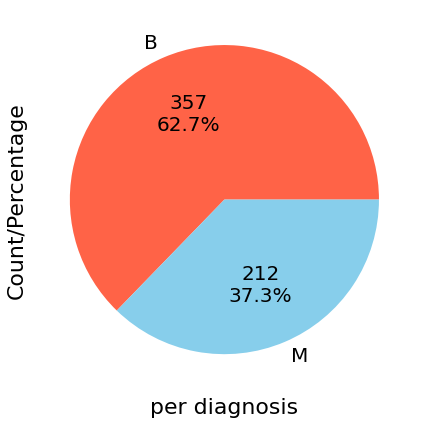

In [ ]:
def label_function(val):
    return f'{val / 100 * len(data):.0f}\n{val:.1f}%'

fig, ax1 = plt.subplots(figsize=(12, 6))
data.groupby('diagnosis').size().plot(kind='pie', autopct=label_function, textprops={'fontsize':20},
                                    colors=['tomato','skyblue'], ax=ax1)
ax1.set_xlabel('per diagnosis', size=22)
ax1.set_ylabel('Count/Percentage', size=22)
plt.tight_layout()
plt.show()


The ration of target variable diagnosis is B:M = 62.7: 37.3, seems to be slightly imbalanced.

# 3.3 Histogram

In [ ]:
df = data.drop('id',axis = 1)  #ignore the id

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

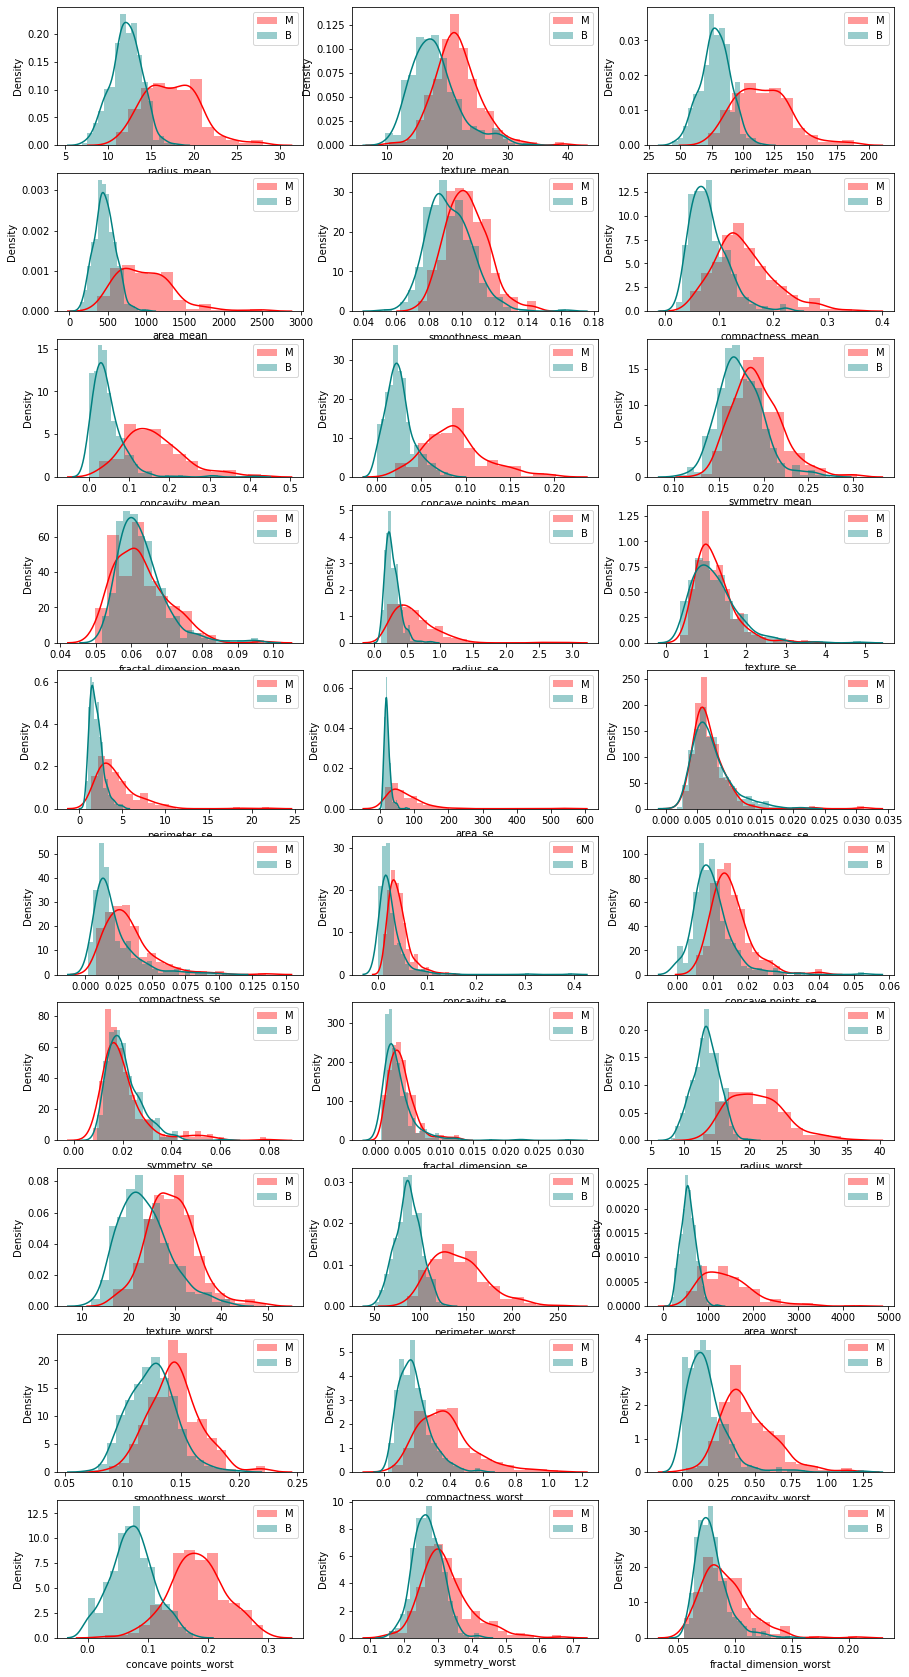

In [ ]:
plt.figure(figsize = (15,30))
for i in range(1,len(list(df.columns))):
  plt.subplot(10,3,i)
  sns.distplot(df[list(df.columns)[i]][df['diagnosis']=='M'], label='M', color='r')
  sns.distplot(df[list(df.columns)[i]][df['diagnosis']=='B'], label='B', color='teal')
  plt.legend()
plt.tight_layout()
plt.show()

Numerica variables are somewhat normal distributed. And the two classes of diagnosis have differnt patterns of these numeric variables, which means we could use numeric variables to predict the diagnosis efficiently. \\

# 3.4 Boxplot

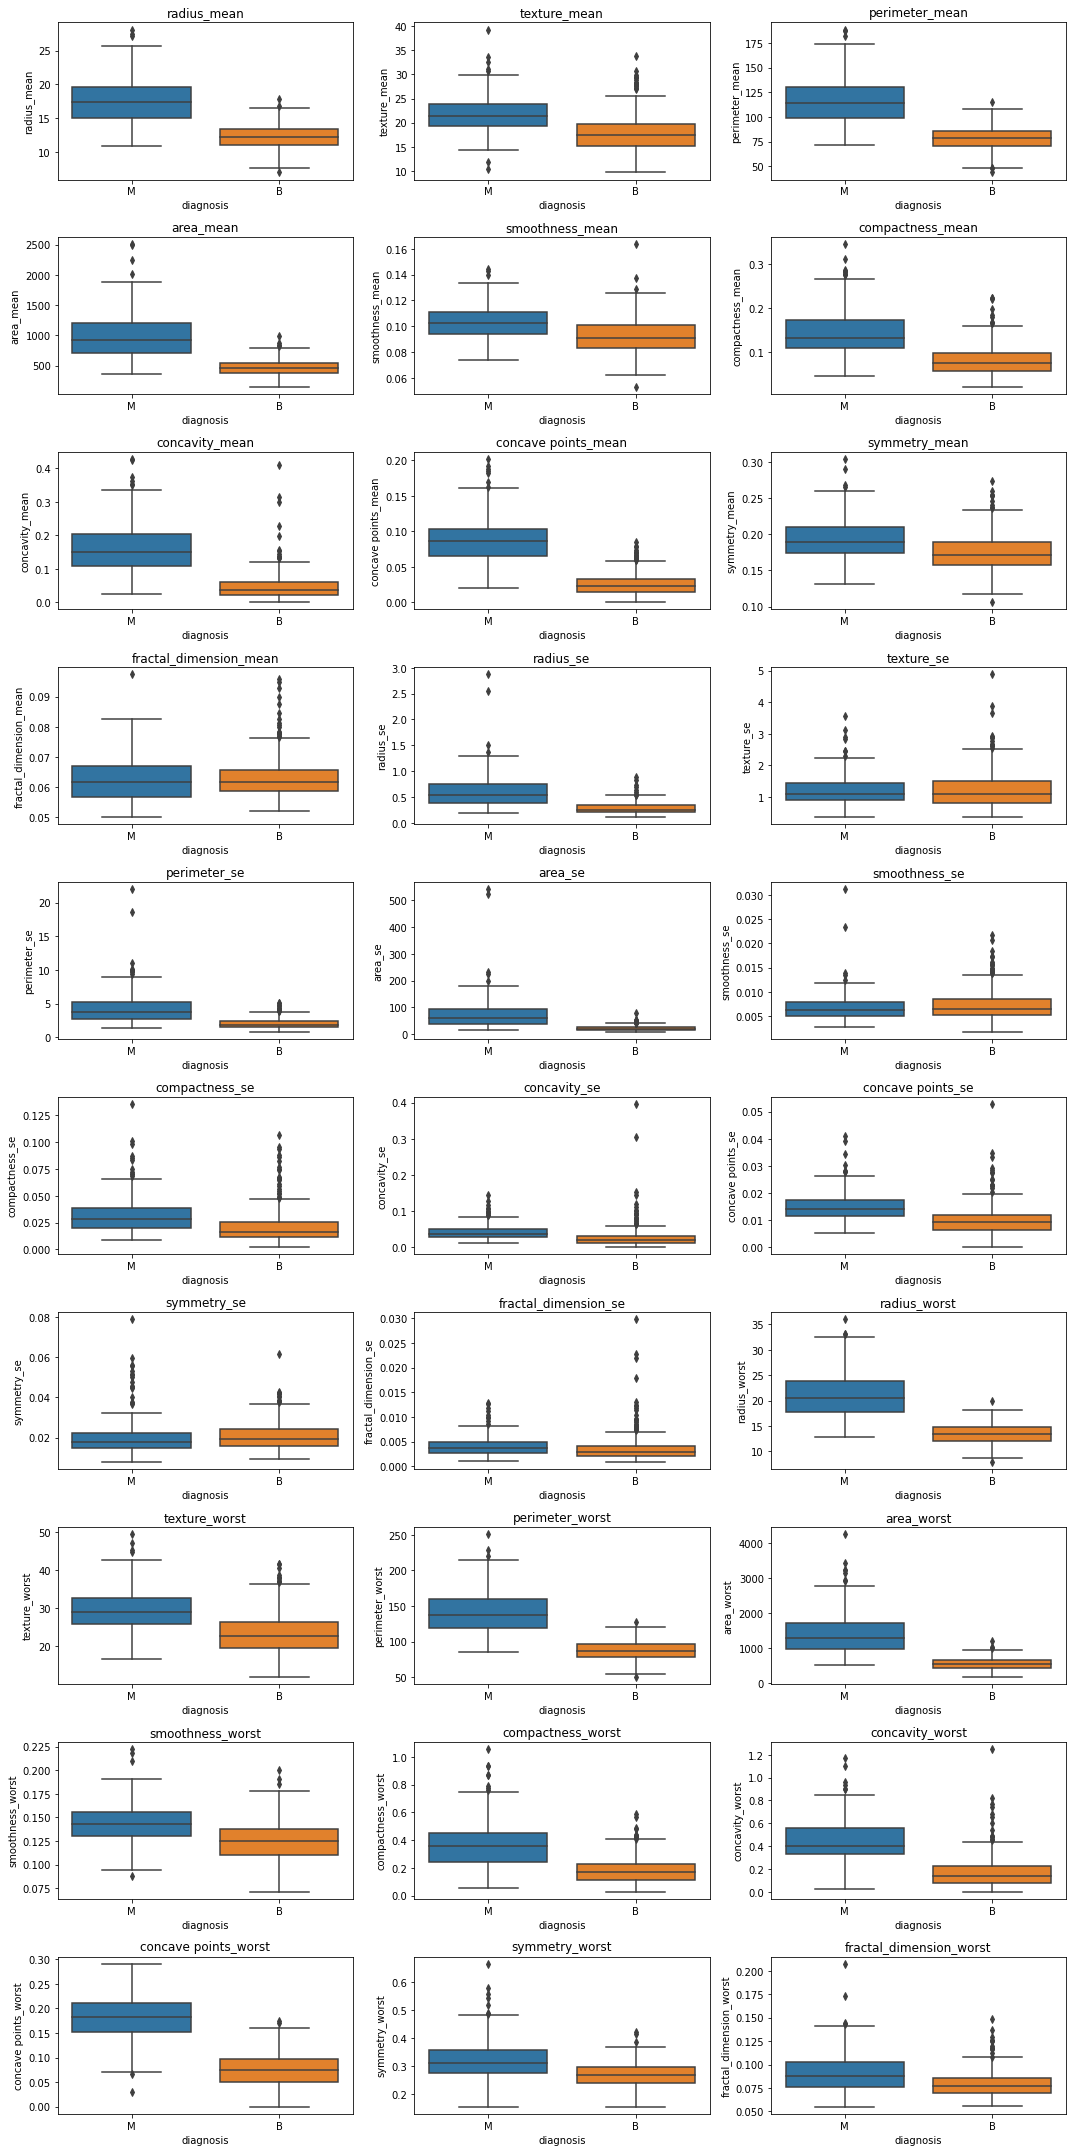

In [ ]:
plt.figure(figsize = (15,30))
for i, b in enumerate(list(df.columns[1:])):
    i = i+1
    ax =plt.subplot(10, 3, i)
    sns.boxplot(x='diagnosis', y=b, data=df)
    ax.set_title(b)
plt.tight_layout()
plt.show()

All numeric variables have outliers when IQR is 1.5, again, we can see that the two classes of diagnosis have differnt patterns of these numeric variables. \\


# 3.5 Pairplot

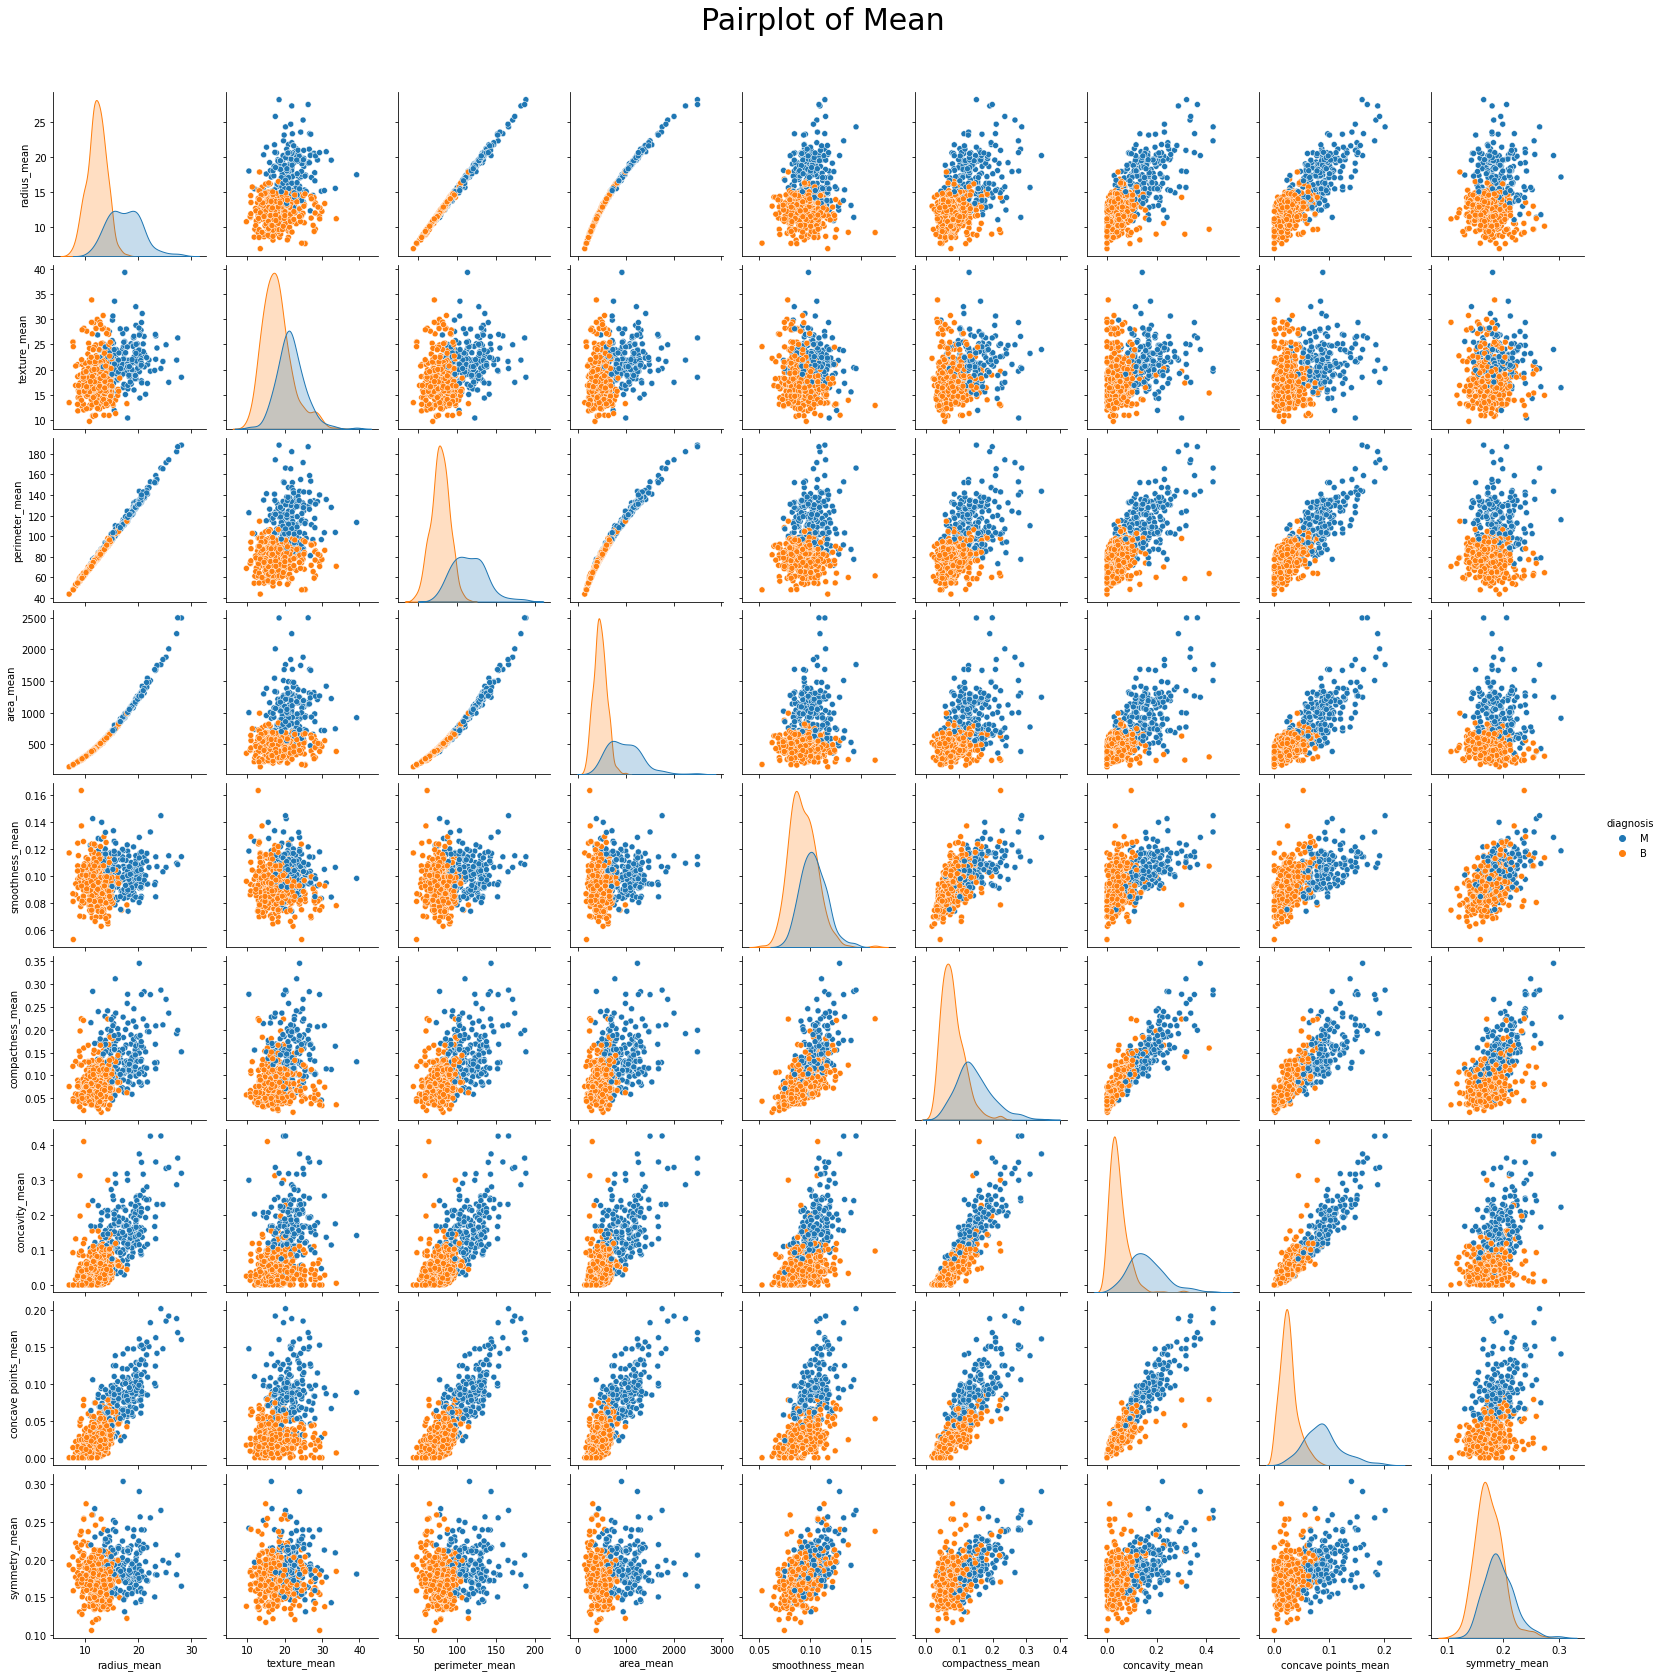

In [ ]:
#pairplot the means cols with target
sns.pairplot(df, hue='diagnosis',vars=list(df.columns[1:10]))
plt.suptitle('Pairplot of Mean', y=1.04, size=30)
plt.show()

From above pairplot, it is obvious that the data distributed in two classes, easy to differentiate in their pairplot. We could also plot the se cols with target, or the worst cols with target. \\

# 3.6 Correlations

Let's further look at the correlations between features

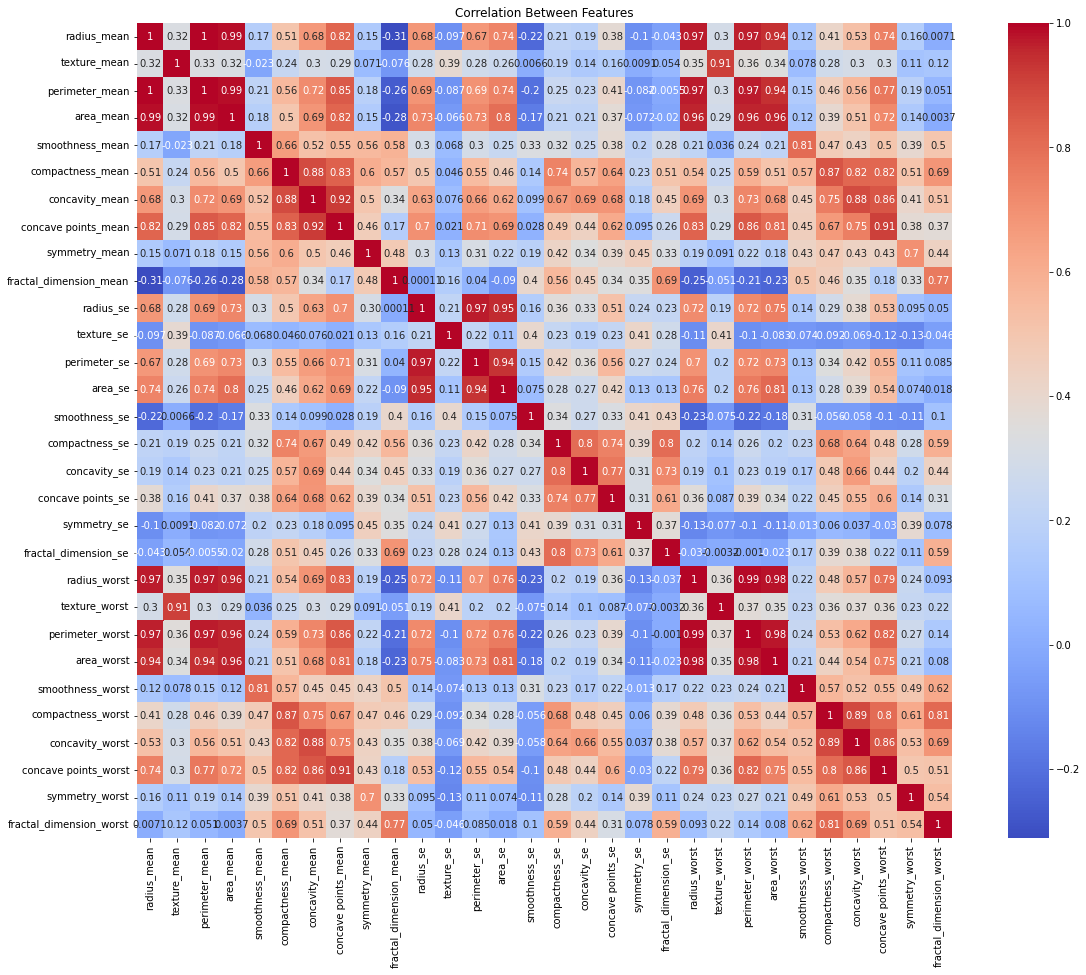

In [ ]:
num_data = df.drop('diagnosis',axis = 1)      
plt.figure (figsize = (20,15))
sns.heatmap(num_data.corr(), annot = True, square = True, cmap = 'coolwarm');
plt.title('Correlation Between Features')
plt.show()

The variables fall into a few groups, which means there seems to be strong multicollinearity in the dataset. \\
Let's apply a threshold, filter the correlated variables.

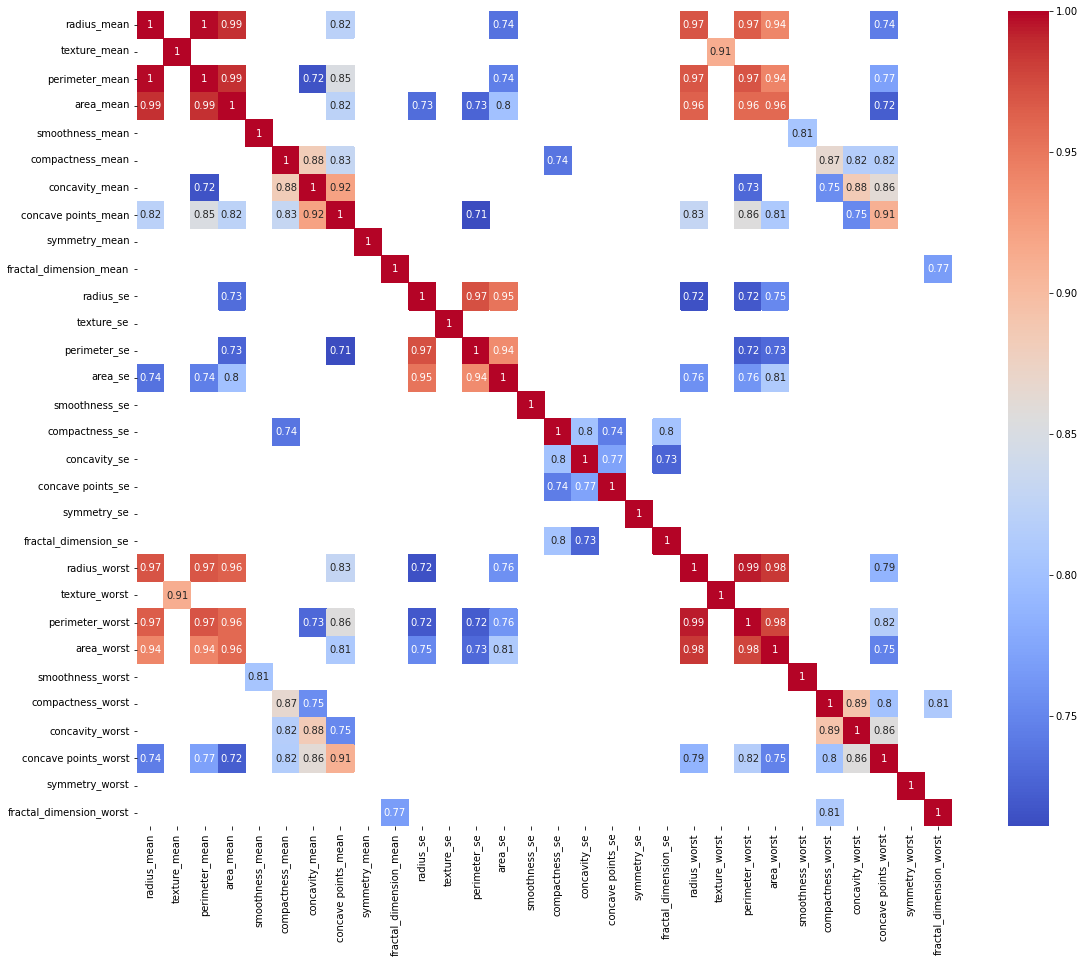

In [ ]:
threshold= 0.7

temp = num_data.corr()[num_data.corr() > threshold]
plt.figure (figsize = (20,15))
sns.heatmap(temp, annot = True, square = True, cmap = 'coolwarm');
plt.show()

We can see that there are still a few groups of highly correlated features. 

## 4 **Processing**
#4.1 Dummy encoding

In [327]:
df_ones = pd.get_dummies(data['diagnosis'])       #2 cols, B and M
datas = pd.concat((df_ones,data),axis=1)
datas = datas.drop(['diagnosis'],axis = 1)        #drop col 'diagnosis'
datas = datas.drop(['M'],axis = 1)                #drop col 'M'
datas = datas.rename(columns = {'B':'diagnosis'})
datas.head()

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**diagnosis 0 means M (malignant, has cancer), 1 means B (benign, is healthy)**

#4.2 Ignore ID

In [328]:
datas = datas.drop(['id'],axis = 1)
datas.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#4.3 Splitting
70/30 split stratified on the target

In [329]:
X = datas.drop('diagnosis', axis=1) # pd.df
y = datas['diagnosis']              # pd.series
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size = 0.3, random_state = 123)

print('Original set  ---> ',X.shape,y.shape,'\nTraining set  ---> ',X_train.shape,y_train.shape,'\nTesting set   ---> ', X_test.shape,'', y_test.shape)

Original set  --->  (569, 30) (569,) 
Training set  --->  (398, 30) (398,) 
Testing set   --->  (171, 30)  (171,)


Assign column names 

In [330]:
X_names = X.columns        #pd.series has no col name

X_train.columns= X_names
X_test.columns= X_names

y_train = pd.DataFrame(y_train, columns=['diagnosis'])
y_test = pd.DataFrame(y_test, columns=['diagnosis'])

Check the stratified split

In [331]:
y_train['diagnosis'].value_counts(normalize=True)

1    0.628141
0    0.371859
Name: diagnosis, dtype: float64

Cool, it's done excellent.

#4.4 Rebalance data 
Rebalance the training data using Borderline SMOTE, upsampling the minority class

In [332]:
from imblearn.over_sampling import BorderlineSMOTE
upsample = BorderlineSMOTE()
X_balance, y_balance = upsample.fit_resample(X_train,y_train)

y_balance['diagnosis'].value_counts(normalize=True)

1    0.5
0    0.5
Name: diagnosis, dtype: float64

In [333]:
X_balance.shape

(500, 30)

# 4.5 Normalize data

Using Z-score method normaliza the predictor data into a distribution with a mean of 0 and a standard deviation of 1.

In [334]:
std = StandardScaler()
X_train_std = std.fit_transform(X_balance)
X_train_std = pd.DataFrame(X_train_std, columns=X_names)

X_train_std.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.345441,-1.339368,-0.360615,-0.408693,-0.251654,-0.243633,-0.813331,-0.892300,-0.707587,1.166792,...,-0.571732,-1.616824,-0.666370,-0.552822,-0.934236,-0.538204,-0.806125,-1.047197,-0.870205,0.652784
1,-0.521935,-1.139584,-0.606968,-0.525396,-1.329295,-1.479822,-1.155881,-1.166352,-1.100761,-0.830092,...,-0.690152,-1.022397,-0.781988,-0.615470,-1.366364,-1.235952,-1.188741,-1.314495,-0.176172,-1.017219
2,0.264549,-0.138197,0.222615,0.125426,-0.581401,-0.270343,-0.532401,-0.139073,0.134397,-0.698222,...,0.004425,-0.022523,0.045022,-0.103531,-0.230484,0.076565,-0.642087,0.296725,-0.085903,-0.164290
3,-1.371586,-1.608213,-1.259555,-1.155225,1.914854,2.027666,0.225419,0.475191,0.794631,4.311479,...,-1.282251,-1.422691,-1.252974,-1.029210,2.621564,0.445426,-0.128194,-0.318744,-0.254602,2.445500
4,-0.831575,0.177511,-0.653356,-0.804497,3.107555,3.222096,1.789541,1.439078,2.797589,4.538887,...,-0.300733,0.030735,-0.290040,-0.568772,3.000190,3.359023,1.704954,1.911216,5.353896,4.293764


normalize test as well

In [335]:
X_test_std = std.fit_transform(X_test)
X_test_std = pd.DataFrame(X_test_std, columns=X_names)

X_test_std.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-1.267604,-0.308440,-1.297060,-1.071570,-2.007428,-1.486609,-1.086356,-1.221896,-0.627964,0.331011,...,-1.326766,-0.834918,-1.358223,-1.038922,-2.711480,-1.412164,-1.252466,-1.710471,-1.595544,-0.993474
1,0.592778,-1.096808,0.518580,0.443935,-0.113424,-0.378320,-0.407092,-0.095331,-0.337685,-0.602067,...,0.320710,-1.035786,0.270789,0.141749,-0.512405,-0.514587,-0.162225,-0.004027,-0.182970,-0.728905
2,-0.470712,-0.219279,-0.448622,-0.497815,0.236353,-0.004091,-0.097719,-0.271232,0.334911,0.210299,...,-0.262354,-0.222670,-0.331930,-0.353176,0.466345,-0.108258,0.008155,-0.176334,0.200651,0.286151
3,-0.293946,-0.897369,-0.259432,-0.385018,0.820555,0.377519,-0.522197,-0.448129,0.483591,0.924789,...,-0.362369,-0.889554,-0.330716,-0.440063,-0.040826,0.138264,-0.360450,-0.609671,0.476989,-0.044998
4,1.537458,0.930424,1.552040,1.494930,0.463336,0.895933,1.444209,0.988938,0.522530,-0.398160,...,1.159132,0.723822,1.151336,1.001635,0.630953,0.257190,0.379592,0.653460,0.047853,-0.377315


# 4.6 Dimensional reduction
Using UMAP mapping features to low dimensional embedding. \\
The metric parameter, tried binary data metrics, 'correlation', 'euclidean', the 'wminkowski' metric works best. I guess it is because X_train_std is Normalized spatial data, so better to use Normalized spatial metrics.

train embedding shape is:  (500, 10)


(-9.619652795791627, 18.154274034500123, -4.471445512771607, 10.54200882911682)

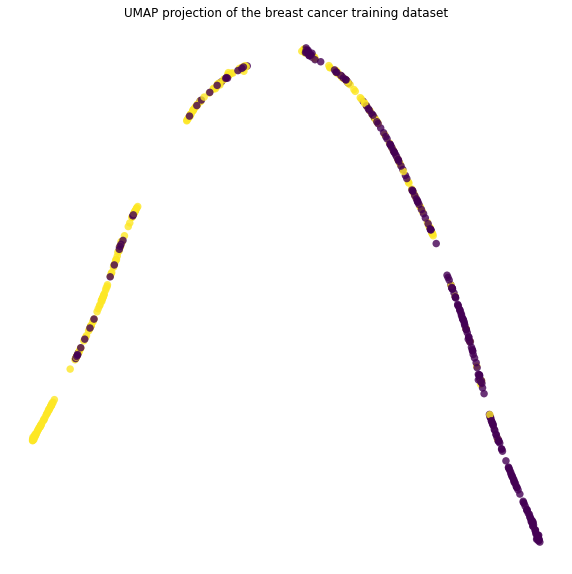

In [354]:
train_eb = UMAP(n_components=10, metric='wminkowski').fit_transform(X_train_std)
print('train embedding shape is: ', train_eb.shape)  

plt.figure(figsize=(10,10))
plt.scatter(train_eb[:,0], train_eb[:,1], c=y_balance.diagnosis, edgecolor='none', alpha=0.80, s=56)
#plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the breast cancer training dataset')
plt.axis('off')

From the shape and the plot, we can see that training data dimension reduces to 2 (set by the n_components parameter). Very clever! \\
Apply UMAP on test dataset

In [355]:
test_eb = UMAP(n_components=10, metric='wminkowski').fit_transform(X_test_std)

#5 **Modelling**: **SVM**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(33.0, 0.5, 'actual labels')

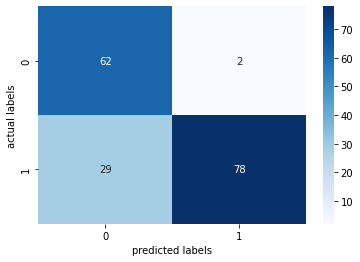

In [356]:
SVM_model = SVC(probability=True, kernel='rbf', C=0.1).fit(train_eb, y_balance)

y_predict = SVM_model.predict(test_eb)

cm = confusion_matrix(y_test, y_predict)
ax = plt.subplot()
sns.heatmap(cm, cmap='Blues', annot=True, ax=ax)

ax.set_xlabel('predicted labels')
ax.set_ylabel('actual labels') 

In [357]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.68      0.97      0.80        64
           1       0.97      0.73      0.83       107

    accuracy                           0.82       171
   macro avg       0.83      0.85      0.82       171
weighted avg       0.87      0.82      0.82       171



We can see that, the model accuracy is 0.82, which is not bad. But there might be accuracy misleading. \\

Looking at precision for both classes, class 1 precision 0.97 is significant higher than class 0 precision 0.68. From above EDA, we know that class 1 represents B (healthy), class 0 represents M (has cancer). It shows that the model is better at predicting the healthy class, but not the cancer class. \\

Looking at recall, class 0 recall 0.97 is significant higher than class 1 recall 0.73. Which means in reality, most cancer cases have been successfully predicted out by the model, while less healty cases have been predicted out. \\

There could be some room to increase the model accuracy. As a medical data, we are trying to predict the cancer (class 0, M) here. So what we care most is how many actual cancer cases in reality could be predicted by the model, it is represented by the recall for class 0. Ideally is 1. \\


#6 **Pipeline** & **CV**
Fit: BorderlineSMOTE + Normalize + UMAP +SVM into pipeline \\
Hyperparameters tuning using 10 fold cross validation

In [343]:
smt = BorderlineSMOTE()   
std = StandardScaler()
umap = UMAP(metric='wminkowski')            
svc = SVC(probability=True, kernel='rbf')
 
pipeline = Pipeline([('smote', smt), ('std', std), ('umap', umap), ('svc', svc)]) 
params_grid_pipeline={
    "umap__n_components" : [10, 15, 20, 25, 30],
    "svc__C" : [10**k for k in range(-3, 3)],                  
    "svc__kernel" : ["rbf"]
}

gs_svm = GridSearchCV(pipeline, params_grid_pipeline, scoring='roc_auc', cv=10)
gs_svm.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('smote',
                                        BorderlineSMOTE(random_state=70)),
                                       ('std', StandardScaler()),
                                       ('umap',
                                        UMAP(metric='correlation', n_neighbors=5)),
                                       ('svc',
                                        SVC(gamma=0.1, probability=True,
                                            random_state=1))]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['rbf'],
                         'umap__n_components': [10, 15, 20, 25, 30]},
             scoring='roc_auc')

In [344]:
gs_svm.best_params_

{'svc__C': 10, 'svc__kernel': 'rbf', 'umap__n_components': 15}

It takes very long to run. Finally, we have got our best parameters, umap__n_components to be 15, svc__C to be 10 in radias basis function kernel. 

#7 **Predict** & **Elevation**
Lastly, let's use the best model from cross validation \\
predict the rest results \\
Evaluation the performance by confusion matric

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(33.0, 0.5, 'actual labels')

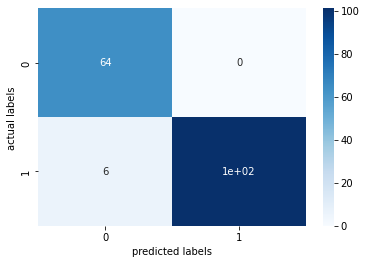

In [341]:
svm = gs_svm.best_estimator_
y_pred = svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, cmap='Blues', annot=True, ax=ax)

ax.set_xlabel('predicted labels')
ax.set_ylabel('actual labels')            #0 is M, 1 is B

In [342]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96        64
           1       1.00      0.94      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



We can see that, the model accuracy is 0.96, higher than previous model, very close to 1. \\

Looking at precision and recall for both classes, they are all over 0.90, that's pretty good. \\

As mentioned before, we are trying to predict the cancer (class 0, M) here. The recall for class 0 is 1.0, which means in reality, all cancer cases have been successfully predicted out by the model. That's excellent!!! \\

After hyperparameters tuning, we obtain a significant good model.